<a href="https://colab.research.google.com/github/RENISA-GRACELIN/Online_Internship_Projects/blob/main/Resnetwithsvm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

700 samples - split into 2 train and val new dataset (8:2)

560 in each training class
140 in each testing class
LOCATION    /content/drive/MyDrive/fruits/data7

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import cv2
import os
from sklearn.svm import SVC
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet import preprocess_input

In [3]:
model = ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [4]:
# define a function to extract features from an image using the MobileNetV2 model
def extract_features(image_path):
    # load the image and resize it to the input shape of the MobileNetV2 model
    image = load_img(image_path, target_size=(224, 224))
    # convert the image to a numpy array
    image = img_to_array(image)
    # preprocess the image for the MobileNetV2 model
    image = preprocess_input(image)
    # use the ResNet152V2 model to extract features from the image
    features = model.predict(np.array([image]))
    # flatten the feature vector to a 1D array
    features = features.flatten()
    return features

In [5]:
model.summary()

Model: "resnet152v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                        

In [6]:
# define the data directory and subdirectories
data_dir = '/content/drive/MyDrive/DR_50'
train_dir = '/content/drive/MyDrive/DR_50/Train'
test_dir = '/content/drive/MyDrive/DR_50/Test'
valid_dir = '/content/drive/MyDrive/DR_50/Valid'

In [7]:
train_data = []
train_labels = []
valid_data = []
valid_labels = []
test_data = []
test_labels = []

In [8]:
for class_dir in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_dir)
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        features = extract_features(image_path)
        train_data.append(features)
        train_labels.append(class_dir)

1/1 [==============================] - 1s 701ms/step


In [9]:
for class_dir in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_dir)
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        features = extract_features(image_path)
        test_data.append(features)
        test_labels.append(class_dir)

1/1 [==============================] - 1s 733ms/step


In [10]:
for class_dir in os.listdir(valid_dir):
    class_path = os.path.join(valid_dir, class_dir)
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        features = extract_features(image_path)
        valid_data.append(features)
        valid_labels.append(class_dir)

1/1 [==============================] - 0s 425ms/step


In [11]:
train_data = np.array(train_data)
train_labels = np.array(train_labels)
valid_data = np.array(valid_data)
valid_labels = np.array(valid_labels)
test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [12]:
# Train SVM classifier
svm = SVC(kernel='linear', C=1.0)
svm.fit(train_data, train_labels)


SVC(kernel='linear')

In [14]:
accuracy = svm.score(valid_data,valid_labels)
print(f'Accuracy: {accuracy}')

Accuracy: 0.46


In [15]:
accuracy = svm.score(test_data,test_labels)
print(f'Accuracy: {accuracy}')

Accuracy: 0.48


In [16]:
model.save("newmodel.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
def predictRF(filename):
  img1=image.load_img(filename,target_size=(224,224))
  plt.imshow(img1)
  X=extract_features(filename)
  X=np.array(X)
  X=X.reshape(1,-1)
  output=svm.predict(X)
  print(output)


1/1 [==============================] - 1s 1s/step
['0']


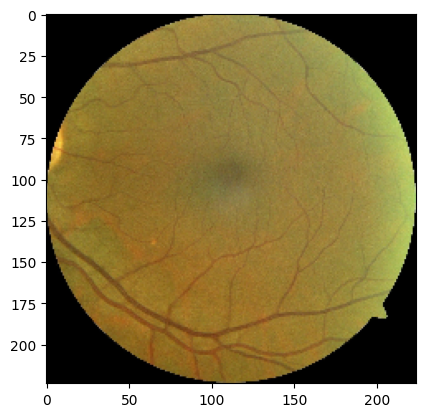

In [22]:
predictRF("/content/drive/MyDrive/DR_50/Test/0/23.jpg")

1/1 [==============================] - 1s 686ms/step
['2']


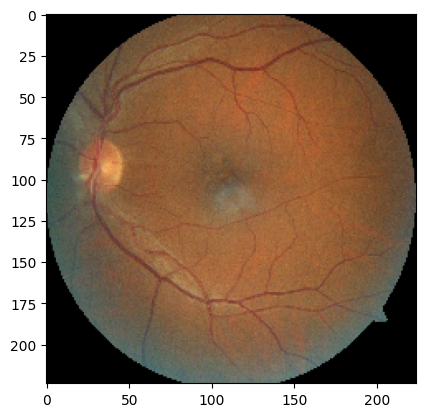

In [23]:
predictRF("/content/drive/MyDrive/DR_50/Test/1/190.jpg")

1/1 [==============================] - 1s 718ms/step
['2']


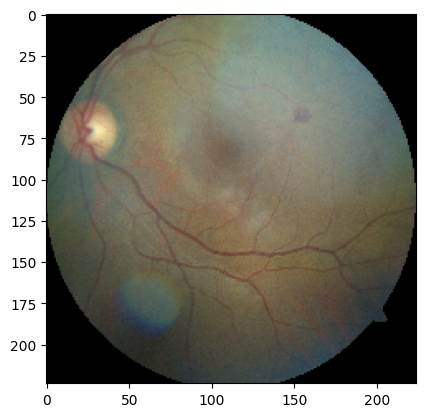

In [24]:
predictRF("/content/drive/MyDrive/DR_50/Test/2/230.jpg")

1/1 [==============================] - 1s 1s/step
['3']


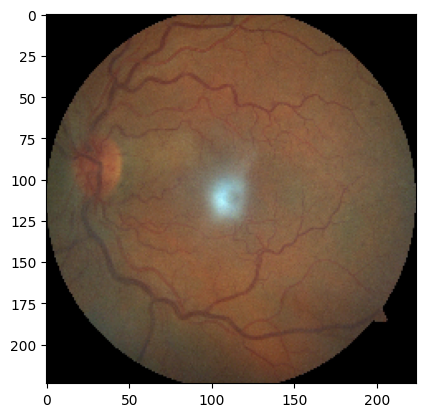

In [25]:
predictRF("/content/drive/MyDrive/DR_50/Test/3/302.jpg")

1/1 [==============================] - 1s 690ms/step
['4']


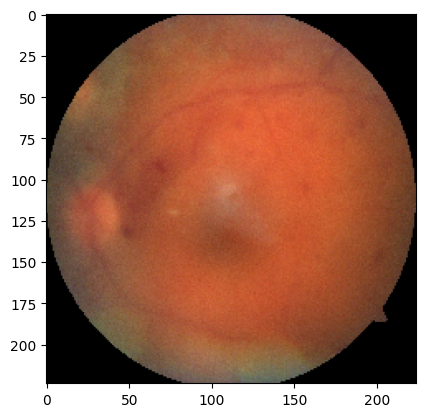

In [26]:
predictRF("/content/drive/MyDrive/DR_50/Test/4/650.jpg")

In [ ]:
#predictRF('/content/drive/MyDrive/testing images/testproj/blackspot.jpg')

In [ ]:
#predictRF("/content/drive/MyDrive/testing images/testproj/greening.jpg")

In [ ]:
#predictRF("/content/drive/MyDrive/testing images/testproj/Scab.jpg")

In [ ]:
#predictRF("/content/drive/MyDrive/testing images/testproj/canker.jpg")

In [ ]:
#predictRF("/content/drive/MyDrive/testing images/testproj/HEALTHY1.jpg")

In [28]:
# Make sure you provide the same target size as initialied for the image size
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
train_set=train_datagen.flow_from_directory('/content/drive/MyDrive/DR_50/Train',target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='categorical')
class_name = train_set.class_indices
print(class_name)


Found 175 images belonging to 5 classes.
{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4}


In [29]:
test_set=train_datagen.flow_from_directory('/content/drive/MyDrive/DR_50/Test',target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='categorical')

Found 25 images belonging to 5 classes.


In [30]:
valid_set=train_datagen.flow_from_directory('/content/drive/MyDrive/DR_50/Valid',target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='categorical')

Found 50 images belonging to 5 classes.


Text(0.5, 1.0, 'Confusion Matrix')

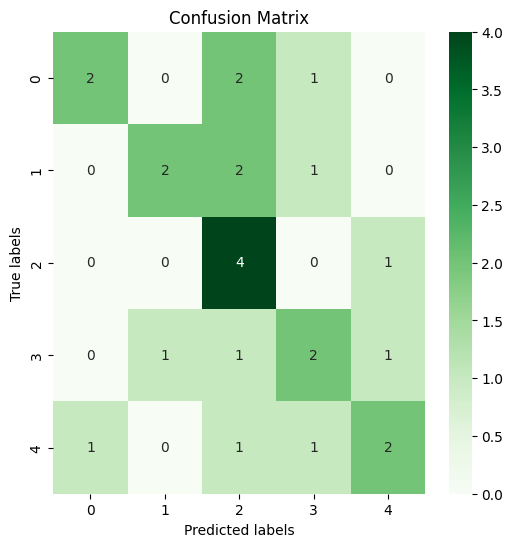

In [31]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
y_pred=svm.predict(test_data)
# compute confusion matrix
cm = confusion_matrix(test_labels, y_pred)

# create heatmap from confusion matrix
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap="Greens", fmt="d", xticklabels=train_set.class_indices.keys(),
            yticklabels=train_set.class_indices.keys(), ax=ax)

# set axis labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [32]:
from sklearn.metrics import classification_report

# Compute classification report
report = classification_report(test_labels, y_pred, target_names=train_set.class_indices.keys())

# Print classification report
print(report)

              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.67      0.40      0.50         5
           2       0.40      0.80      0.53         5
           3       0.40      0.40      0.40         5
           4       0.50      0.40      0.44         5

    accuracy                           0.48        25
   macro avg       0.53      0.48      0.48        25
weighted avg       0.53      0.48      0.48        25



In [33]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
precision = precision_score(test_labels, y_pred, average='macro')
recall = recall_score(test_labels, y_pred, average='macro')
accuracy = accuracy_score(test_labels, y_pred)
f1 = f1_score(test_labels, y_pred, average='macro')

print('Precision:', precision)
print('Recall:', recall)
print('Accuracy:', accuracy)
print('F1 Score:', f1)

Precision: 0.5266666666666666
Recall: 0.48
Accuracy: 0.48
F1 Score: 0.47555555555555556
